

# Lending Club Case Study

This Case study provides a financial risk analysis service enabling the lending club to properly decide on accepting or rejecting loan applications and decide on the proper interest rate for accepted applications. 

**Problem Statement**

Accepting or rejecting loan applications carries 2 types of financial risks:
1- Rejecting loans for applicants who are likely to repay results in a loss of business to the LendingClub.
2- Approving the loan applicants who are likely to default (not repaying) will result in a financial loss for the LendingClub.
The study aims to analyze applicant propability of repaying or defaulting and provide the LendingClub a solid basis to decide on accpeting or rejecting applications and deciding on the proper interest rates.


**Study Methodology**
The study is based on a lending history dataset provided by the LendingClub. The study analyzes the data set and provide a strong basis for measuring the default proability of applicants based on different crityeria. The study is completed in 3 steps as follows:
1- Analyse the data set and decide on the variables that can serve in the analysis study; remove all useless variables to reduce ambiguity and focus only on useful data.
2- Clean/fix data values in important variables, and generate new matrics if needed in preperation for the analysis.
3- Analyze the different variables and their relation to default probability.

### Step 1 - Importing required libraries and data files

In [1]:
#import the required libraries
import pandas as pd
import numpy as np
loans = pd.read_csv("loan.csv", low_memory=False)

### Data Handling and Cleaning

The first few steps involve removing Header and footer if exist, and deciding on variables needed for the study, while dropping all other useless variables. 

In [2]:
#read the dataset head and check if there is header to remove
loans.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [3]:
#read the dataset tail and check if there is footer to remove
loans.tail()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
39712,92187,92174,2500,2500,1075.0,36 months,8.07%,78.42,A,A4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39713,90665,90607,8500,8500,875.0,36 months,10.28%,275.38,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39714,90395,90390,5000,5000,1325.0,36 months,8.07%,156.84,A,A4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39715,90376,89243,5000,5000,650.0,36 months,7.43%,155.38,A,A2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39716,87023,86999,7500,7500,800.0,36 months,13.75%,255.43,E,E2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### the above statements show that the data set contains no header and no footer to remove. All rows contains data.
Step 2: check for the usefull/useless variables in the dataset and drop useless variables

In [4]:
#Check the shape of the dataframe
loans.shape

(39717, 111)

In [5]:
#Dataset has 111 columns; a very big number;
#Check the number of null values in the columns
loans.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

In [6]:
# We notice many columns has 39717 null values; i.e. all rows are Null! lets drop all columns with no values
loans=loans.dropna(axis=1, how='all')

In [7]:
loans.shape

(39717, 57)

In [8]:
#Now we have 57 columns instead of 111. 
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 57 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39717 non-null  int64  
 1   member_id                   39717 non-null  int64  
 2   loan_amnt                   39717 non-null  int64  
 3   funded_amnt                 39717 non-null  int64  
 4   funded_amnt_inv             39717 non-null  float64
 5   term                        39717 non-null  object 
 6   int_rate                    39717 non-null  object 
 7   installment                 39717 non-null  float64
 8   grade                       39717 non-null  object 
 9   sub_grade                   39717 non-null  object 
 10  emp_title                   37258 non-null  object 
 11  emp_length                  38642 non-null  object 
 12  home_ownership              39717 non-null  object 
 13  annual_inc                  397

### Understanding the data 
This task includes 2 major steps: Identifying relevent and important variables.

1- Relevent Variables: are variable that describe the customer or the loan characteristics. Variables related to the customer behavior on the loan are irrelevent to the study as they are only available after the loan approval and during the loan period. Other variables like the url or free text customer entered values, or variables with a very high perccentage of Null values are also irrelevent.

2- Important Variables: are relevent variable with enough variance to benefit the study. Variables with no much variation will not benefit the study.

In [9]:
# Before checking the Variables, let's check the loans status to decide whether to exclude some loans.
loans['loan_status'].value_counts()

Fully Paid     32950
Charged Off     5627
Current         1140
Name: loan_status, dtype: int64

In [10]:
# As the analysis targets to study risky loan applicants, Current Loans can't be studied as we don't know
# whether they will default or fget fully paid. Thus only closed loans are meaningful for the study (fully paid, or Charged Off).
# As Current Loans are useless for the study, then let's exclude all Current Loans (1140 rows)
loans = loans[loans['loan_status'] != "Current"]
loans.shape

(38577, 57)

In [11]:
# Let's also check for any duplicate rows and drop them
loans = loans.drop_duplicates()
loans.shape

(38577, 57)

In [12]:
#Reset the index
loans.reset_index(inplace=True, drop=True)

#### Relivent Variables
let's check the 57 cloumns (variables) and decide which variables are relivent and important for the study.
As the study aims to predict customers that will probably default, at the time of application submission,
then only customer descriptive variables, loan characteristics, and variables related to the applicant's status made available by the credit bureau are relivent to the study.
Behavior variables that provide info about the loan after approval like payments or delinquent are irrelivent for the study.

Using Excel, on the provided data_dictionary file, let's revise the 57 remaining variables and identify them as "Relivent (1/0)" based on the provided description. Create a new data Dictionary "Variable.csv" with Relivent field (1/0); A note field explains why the variable is considered irrelevent. (BV means Behavioral Variable).

In [13]:
# Import the created disctionary of variables
variables = pd.read_csv("Variables.csv")

In [14]:
# Revise Relevent variables
variables[variables['Relivent']==1]

,Variable,Relivent,Note,Dtype,Non-Null Count,Null Count,Description
0,acc_now_delinq,1,NaN,int64,38577,0,The number of accounts on which the borrower i...
1,addr_state,1,NaN,object,38577,0,The state provided by the borrower in the loan...
2,annual_inc,1,NaN,float64,38577,0,The self-reported annual income provided by th...
4,chargeoff_within_12_mths,1,NaN,float64,38521,56,Number of charge-offs within 12 months
8,delinq_amnt,1,NaN,int64,38577,0,The past-due amount owed for the accounts on w...
10,dti,1,NaN,float64,38577,0,A ratio calculated using the borrower’s total ...
12,emp_length,1,NaN,object,37544,1033,Employment length in years. Possible values ar...
13,emp_title,1,NaN,object,36191,2386,The job title supplied by the Borrower when ap...
14,funded_amnt,1,NaN,int64,38577,0,The total amount committed to that loan at tha...
15,funded_amnt_inv,1,NaN,float64,38577,0,The total amount committed by investors for th...


In [15]:
# Revise irrelevent variables
variables[variables['Relivent']==0]

,Variable,Relivent,Note,Dtype,Non-Null Count,Null Count,Description
3,application_type,0,BV,object,38577,0,Indicates whether the loan is an individual ap...
5,collection_recovery_fee,0,BV,float64,38577,0,post charge off collection fee
6,collections_12_mths_ex_med,0,NaN,float64,38521,56,Number of collections in 12 months excluding m...
7,delinq_2yrs,0,BV,int64,38577,0,The number of 30+ days past-due incidences of ...
9,desc,0,User Added Free Text,object,26050,12527,Loan description provided by the borrower
11,earliest_cr_line,0,BV,object,38577,0,The month the borrower's earliest reported cre...
20,inq_last_6mths,0,BV,int64,38577,0,The number of inquiries in past 6 months (excl...
23,issue_d,0,BV,object,38577,0,The month which the loan was funded
24,last_credit_pull_d,0,BV,object,38575,2,The most recent month LC pulled credit for thi...
25,last_pymnt_amnt,0,BV,float64,38577,0,Last total payment amount received


In [16]:
#Drop all irrelevent variables based on the created dictionary
for col in variables[variables['Relivent']==0]['Variable']:
    loans.drop(col,inplace=True, axis=1, errors='ignore')

In [17]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38577 entries, 0 to 38576
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        38577 non-null  int64  
 1   member_id                 38577 non-null  int64  
 2   loan_amnt                 38577 non-null  int64  
 3   funded_amnt               38577 non-null  int64  
 4   funded_amnt_inv           38577 non-null  float64
 5   term                      38577 non-null  object 
 6   int_rate                  38577 non-null  object 
 7   installment               38577 non-null  float64
 8   grade                     38577 non-null  object 
 9   sub_grade                 38577 non-null  object 
 10  emp_title                 36191 non-null  object 
 11  emp_length                37544 non-null  object 
 12  home_ownership            38577 non-null  object 
 13  annual_inc                38577 non-null  float64
 14  verifi

In [18]:
loans.drop('id', inplace=True, axis=1, errors='ignore')
loans.drop('member_id', inplace=True, axis=1, errors='ignore')

#### Droping variable with single value
Variables with single value is not important for analysis and should be dropped. Variables like Id and Member id are also not important for our study. So let's drop these variables.

In [19]:
#Check the values in different coulmns and drop the column if it has one unique value; columns with unique values are useless for the analysis
for col in loans.columns:
    if len(loans[col].unique()) == 1:
        loans.drop(col,inplace=True,axis=1)
loans.shape

(38577, 21)

   #### Our loans data set is clean now with have only important variables useful for analysis

In [20]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38577 entries, 0 to 38576
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   loan_amnt                 38577 non-null  int64  
 1   funded_amnt               38577 non-null  int64  
 2   funded_amnt_inv           38577 non-null  float64
 3   term                      38577 non-null  object 
 4   int_rate                  38577 non-null  object 
 5   installment               38577 non-null  float64
 6   grade                     38577 non-null  object 
 7   sub_grade                 38577 non-null  object 
 8   emp_title                 36191 non-null  object 
 9   emp_length                37544 non-null  object 
 10  home_ownership            38577 non-null  object 
 11  annual_inc                38577 non-null  float64
 12  verification_status       38577 non-null  object 
 13  loan_status               38577 non-null  object 
 14  purpos

#### Last Data Cleaning steps before analysis
Few last steps before analysis; let's have a look at the different variables and their values, do type changes when needed, handle na values, and identify possibility of outliers. To complete these steps we will use value_counts, isnull, and describe function. Also use visualization to identify outliers.

In [21]:
loans['loan_amnt'].describe()

count    38577.000000
mean     11047.025430
std       7348.441646
min        500.000000
25%       5300.000000
50%       9600.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

In [22]:
loans['funded_amnt'].describe()

count    38577.000000
mean     10784.058506
std       7090.306027
min        500.000000
25%       5200.000000
50%       9550.000000
75%      15000.000000
max      35000.000000
Name: funded_amnt, dtype: float64

In [23]:
loans['funded_amnt_inv'].describe()

count    38577.000000
mean     10222.481123
std       7022.720644
min          0.000000
25%       5000.000000
50%       8733.440000
75%      14000.000000
max      35000.000000
Name: funded_amnt_inv, dtype: float64

We can see no much difference between loan_amnt, funded_amnt, and funded_amnt_inv. As funded amount and funded_amnt_inv are only decided after the loan is approved, while loan amount is available befor the decision, then we will use the loan_amnt for the analysis. So let's drop the funded_amnt and funded_amnt_inv

In [24]:
loans.drop('funded_amnt', inplace=True, axis=1)
loans.drop('funded_amnt_inv', inplace=True, axis=1)

In [25]:
loans['term'].value_counts()

 36 months    29096
 60 months     9481
Name: term, dtype: int64

term is a categorical variable where we can study default probability based on each term "36 months" and "60 months"

In [26]:
loans['int_rate'].value_counts()

10.99%    913
11.49%    790
7.51%     787
13.49%    749
7.88%     725
         ... 
16.96%      1
18.36%      1
16.15%      1
16.01%      1
16.20%      1
Name: int_rate, Length: 370, dtype: int64

In [27]:
loans['int_rate'] = loans['int_rate'].str.rstrip('%').astype('float').round().astype('int') 

In [28]:
loans['int_rate']

0        11
1        15
2        16
3        13
4         8
         ..
38572     8
38573    10
38574     8
38575     7
38576    14
Name: int_rate, Length: 38577, dtype: int32

Interest rate (continious variable) can be a predictor of default. We can do binning of 5 on interest rate and analyze its relation to default. 

In [29]:
loans['installment'].describe()

count    38577.000000
mean       322.466318
std        208.639215
min         15.690000
25%        165.740000
50%        277.860000
75%        425.550000
max       1305.190000
Name: installment, dtype: float64

Installments is another continious variable where binning of size 100 can be applied for analysis;

In [30]:
loans['grade'].value_counts()

B    11675
A    10045
C     7834
D     5085
E     2663
F      976
G      299
Name: grade, dtype: int64

grade is a categorical variable where default rate can be analyzed against various categories.

In [31]:
loans['sub_grade'].value_counts()

A4    2873
B3    2825
A5    2715
B5    2615
B4    2437
C1    2055
B2    2001
C2    1931
A3    1810
B1    1797
A2    1508
C3    1488
D2    1286
C4    1206
C5    1154
A1    1139
D3    1116
D1     931
D4     918
D5     834
E1     722
E2     614
E3     516
E4     424
E5     387
F1     305
F2     233
F3     174
F4     151
F5     113
G1      94
G2      77
G4      54
G3      45
G5      29
Name: sub_grade, dtype: int64

sub_grade is another categorcal variable that can be used in conjunction with Cateories to analyze default against each subcategory in each category. 

In [32]:
loans['emp_title'].value_counts()

US Army                                     131
Bank of America                             107
IBM                                          65
AT&T                                         57
Kaiser Permanente                            56
                                           ... 
amneal pharmaceuticals                        1
Net Equity Financial                          1
Kernersville Fire Department                  1
The Keith Corp. (empl by county, now Kei      1
Evergreen Center                              1
Name: emp_title, Length: 28027, dtype: int64

In [33]:
# emp_title will not add any meaningful value to the analysis. so, let's drop this variable.
loans.drop('emp_title', inplace=True, axis=1, errors='ignore')

In [34]:
loans['emp_length'].value_counts()

10+ years    8488
< 1 year     4508
2 years      4291
3 years      4012
4 years      3342
5 years      3194
1 year       3169
6 years      2168
7 years      1711
8 years      1435
9 years      1226
Name: emp_length, dtype: int64

emp_length is a categorical variable where we can analyze default rate across various categories.

In [35]:
loans['home_ownership'].value_counts()

RENT        18480
MORTGAGE    17021
OWN          2975
OTHER          98
NONE            3
Name: home_ownership, dtype: int64

emp_length is a categorical variable where we can analyze default rate across various categories.

In [36]:
loans['annual_inc'].describe()

count    3.857700e+04
mean     6.877797e+04
std      6.421868e+04
min      4.000000e+03
25%      4.000000e+04
50%      5.886800e+04
75%      8.200000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64

A Max value of 6x10^6 in annual_inc compared to 8.2x10^4 as the 75% percentile indicate a high probability of outliers; Let's visualize this variable data to identify outliers.

<AxesSubplot:>

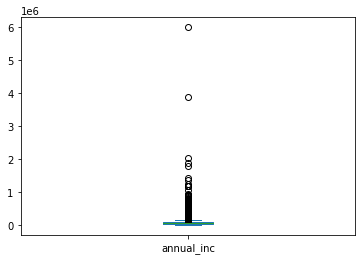

In [37]:
loans['annual_inc'].plot.box()

In [38]:
loans[loans['annual_inc']>3*10**6]

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,zip_code,addr_state,dti,chargeoff_within_12_mths,pub_rec_bankruptcies,tax_liens
28499,25000,60 months,11,334.08,B,B3,3 years,MORTGAGE,3900000.0,Not Verified,Fully Paid,home_improvement,882xx,NM,0.20,0.0,0.0,0.0
28967,5000,36 months,13,167.84,C,C1,10+ years,MORTGAGE,6000000.0,Source Verified,Fully Paid,home_improvement,939xx,CA,0.01,0.0,0.0,0.0


The above box plot on the annual_inc shows 2 outlier values  of 3900000 and 6000000. Yet as our analysis will be based on annual income ranges where the highest range will include these values, these outliers will by just counted as 2 values with no influence of the amount on the analysis; Thus no need to exclude or replace these values.

annual_inc is another categorical variable and we can use binning in our analysis (<40000, 40000-80000, and > 80000)

In [39]:
loans['verification_status'].value_counts()

Not Verified       16694
Verified           12206
Source Verified     9677
Name: verification_status, dtype: int64

Another categorical variable where we can analyze default rate across various categories.

In [40]:
loans['loan_status'].value_counts()

Fully Paid     32950
Charged Off     5627
Name: loan_status, dtype: int64

#### Will use loan status to identify good and bad loans; let's add these 2 variables then drop the loan_status.

In [41]:
loans['good_loan']= np.where(loans['loan_status'] == 'Fully Paid', 1, 0)
loans['bad_loan']= np.where(loans['loan_status'] == 'Charged Off', 1, 0)
loans.drop('loan_status', inplace=True, axis=1, errors='ignore')

In [42]:
loans.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,purpose,zip_code,addr_state,dti,chargeoff_within_12_mths,pub_rec_bankruptcies,tax_liens,good_loan,bad_loan
0,5000,36 months,11,162.87,B,B2,10+ years,RENT,24000.0,Verified,credit_card,860xx,AZ,27.65,0.0,0.0,0.0,1,0
1,2500,60 months,15,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,car,309xx,GA,1.00,0.0,0.0,0.0,0,1
2,2400,36 months,16,84.33,C,C5,10+ years,RENT,12252.0,Not Verified,small_business,606xx,IL,8.72,0.0,0.0,0.0,1,0
3,10000,36 months,13,339.31,C,C1,10+ years,RENT,49200.0,Source Verified,other,917xx,CA,20.00,0.0,0.0,0.0,1,0
4,5000,36 months,8,156.46,A,A4,3 years,RENT,36000.0,Source Verified,wedding,852xx,AZ,11.20,0.0,0.0,0.0,1,0


In [43]:
loans['purpose'].value_counts()

debt_consolidation    18055
credit_card            5027
other                  3865
home_improvement       2875
major_purchase         2150
small_business         1754
car                    1499
wedding                 926
medical                 681
moving                  576
vacation                375
house                   367
educational             325
renewable_energy        102
Name: purpose, dtype: int64

purpose is another categorical variable where we can analyze default rate across various categories.

In [44]:
loans['zip_code'].value_counts()

100xx    583
945xx    531
112xx    502
606xx    493
070xx    455
        ... 
463xx      1
381xx      1
592xx      1
414xx      1
469xx      1
Name: zip_code, Length: 822, dtype: int64

In [45]:
loans['addr_state'].value_counts()

CA    6949
NY    3698
FL    2781
TX    2659
NJ    1790
IL    1478
PA    1468
VA    1369
GA    1359
MA    1297
OH    1178
MD    1023
AZ     849
WA     818
CO     766
NC     750
CT     726
MI     704
MO     670
MN     605
NV     479
SC     459
WI     440
AL     435
OR     435
LA     427
KY     311
OK     287
KS     255
UT     252
AR     235
DC     211
RI     194
NM     183
WV     172
NH     166
HI     166
DE     113
MT      83
WY      80
AK      78
SD      62
VT      53
MS      19
TN      17
IN       9
ID       6
IA       5
NE       5
ME       3
Name: addr_state, dtype: int64

In [46]:
loans['dti'].describe()

count    38577.000000
mean        13.272727
std          6.673044
min          0.000000
25%          8.130000
50%         13.370000
75%         18.560000
max         29.990000
Name: dti, dtype: float64

dti is a continious variable where we can use binning to analyze its relation to default; Bins can be defined as (<8, 8-14, 14-18, >18)

In [47]:
loans['pub_rec_bankruptcies'].value_counts()

0.0    36238
1.0     1637
2.0        5
Name: pub_rec_bankruptcies, dtype: int64

In [48]:
#pub_rec_bankruptcies doesn't provide enough enformation to help in analysis, let's drop this variable.
loans.drop('pub_rec_bankruptcies', inplace=True, axis=1, errors='ignore')

In [49]:
loans['tax_liens'].value_counts()

0.0    38538
Name: tax_liens, dtype: int64

In [50]:
#pub_rec_bankruptcies doesn't provide enough enformation to help in analysis, let's drop this variable.
loans.drop('tax_liens', inplace=True, axis=1, errors='ignore')

## Analysis
#### Now we have revised all the variables and recognized categorical and Continious variables, we will start our analysis. 
##### We will analyze categorical variables and continious variable and their relation to the Default probability.
We will create 2 generic functions to complete the analysis:

1- analyze_cat function for categorical univariate analysis. (Analyze Default ration by Category 

2- analyze_cont function for continuous univariate analysis. (Analyze Default on variable change between bins)

In [51]:
def analyze_cat(catvar):
    analyze = loans.groupby([catvar])[['good_loan','bad_loan']].sum()
    analyze['good_ratio'] = round(analyze['good_loan']/(analyze['good_loan']+analyze['bad_loan']),2)
    analyze['bad_ratio'] = round(analyze['bad_loan']/(analyze['good_loan']+analyze['bad_loan']),2)
    return analyze.sort_values(by='bad_ratio', ascending=False)

In [52]:
def analyze_cont(contvar,binsize):
    analyze = loans
    analyze = analyze[analyze[contvar].notna()]      #reomve null values
    bin = contvar+'_range'
    analyze[bin] = ''
    maxbin=int((analyze[contvar].max())+binsize)
    for x in range(0, maxbin, binsize):
        analyze[bin]= np.where((analyze[contvar] >= x) & (analyze[contvar] < x + binsize),x+binsize,analyze[bin])
    analyze = analyze.groupby([bin])[['good_loan','bad_loan']].sum()
    analyze['good_ratio'] = round(analyze['good_loan']/(analyze['good_loan']+analyze['bad_loan']),2)
    analyze['bad_ratio'] = round(analyze['bad_loan']/(analyze['good_loan']+analyze['bad_loan']),2)
    return analyze

In [53]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38577 entries, 0 to 38576
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   loan_amnt                 38577 non-null  int64  
 1   term                      38577 non-null  object 
 2   int_rate                  38577 non-null  int32  
 3   installment               38577 non-null  float64
 4   grade                     38577 non-null  object 
 5   sub_grade                 38577 non-null  object 
 6   emp_length                37544 non-null  object 
 7   home_ownership            38577 non-null  object 
 8   annual_inc                38577 non-null  float64
 9   verification_status       38577 non-null  object 
 10  purpose                   38577 non-null  object 
 11  zip_code                  38577 non-null  object 
 12  addr_state                38577 non-null  object 
 13  dti                       38577 non-null  float64
 14  charge

In [54]:
analyze=analyze_cat('term')
analyze

,good_loan,bad_loan,good_ratio,bad_ratio
term,,,,
60 months,7081,2400,0.75,0.25
36 months,25869,3227,0.89,0.11


<AxesSubplot:ylabel='bad_ratio'>

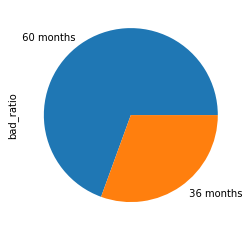

In [55]:
# Let's plot the risk factor for each term
analyze['bad_ratio'].plot(kind='pie')

Recommend using 36 months terms as it has less probability of default 11% compared to 25% for 60 months term

In [56]:
analyze=analyze_cat('grade')
analyze

,good_loan,bad_loan,good_ratio,bad_ratio
grade,,,,
G,198,101,0.66,0.34
F,657,319,0.67,0.33
E,1948,715,0.73,0.27
D,3967,1118,0.78,0.22
C,6487,1347,0.83,0.17
B,10250,1425,0.88,0.12
A,9443,602,0.94,0.06


<AxesSubplot:xlabel='grade'>

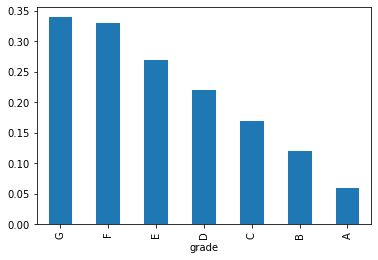

In [57]:
# Let's plot the risk factor for each category
analyze['bad_ratio'].plot(kind='bar')

Default probability increases when moving from grade A-B..G.Grades "

Grade A" is best 6% Default probability while "Grade G" is worst 34% default probability. 

In [58]:
analyze=analyze_cat('sub_grade')
analyze

,good_loan,bad_loan,good_ratio,bad_ratio
sub_grade,,,,
F5,59,54,0.52,0.48
G3,26,19,0.58,0.42
G2,49,28,0.64,0.36
F4,98,53,0.65,0.35
G5,19,10,0.66,0.34
G1,63,31,0.67,0.33
F2,163,70,0.70,0.30
E4,298,126,0.70,0.30
F1,214,91,0.70,0.30


F5 has the highest Default probability 48%, followed by G3 42%

In [59]:
analyze=analyze_cat('emp_length')
analyze

,good_loan,bad_loan,good_ratio,bad_ratio
emp_length,,,,
10+ years,7157,1331,0.84,0.16
7 years,1448,263,0.85,0.15
1 year,2713,456,0.86,0.14
3 years,3457,555,0.86,0.14
4 years,2880,462,0.86,0.14
5 years,2736,458,0.86,0.14
6 years,1861,307,0.86,0.14
8 years,1232,203,0.86,0.14
< 1 year,3869,639,0.86,0.14


<AxesSubplot:xlabel='emp_length'>

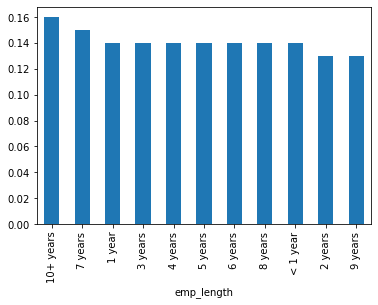

In [60]:
# Let's plot the risk factor for each category
analyze['bad_ratio'].plot(kind='bar')

Emplyment Length doesn't much affect default probability; All ranges between 12.9 and 15.9%; 10+ years has little higher default probability

In [61]:
analyze=analyze_cat('home_ownership')
analyze

,good_loan,bad_loan,good_ratio,bad_ratio
home_ownership,,,,
OTHER,80,18,0.82,0.18
OWN,2532,443,0.85,0.15
RENT,15641,2839,0.85,0.15
MORTGAGE,14694,2327,0.86,0.14
NONE,3,0,1.00,0.00


<AxesSubplot:xlabel='home_ownership'>

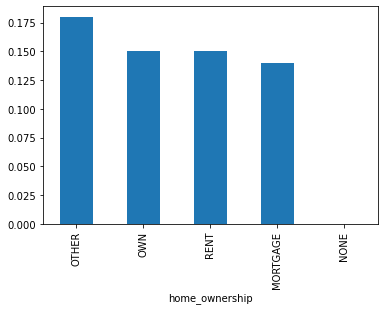

In [62]:
# Let's plot the risk factor for each category
analyze['bad_ratio'].plot(kind='bar')

Home Ownership doesn't much affect default probability; All ranges between 13.7 and 18.4%; OTHER (Applicants who don't announce the information) has higher Default probability.

In [63]:
analyze=analyze_cat('purpose')
analyze

,good_loan,bad_loan,good_ratio,bad_ratio
purpose,,,,
small_business,1279,475,0.73,0.27
renewable_energy,83,19,0.81,0.19
educational,269,56,0.83,0.17
house,308,59,0.84,0.16
medical,575,106,0.84,0.16
moving,484,92,0.84,0.16
other,3232,633,0.84,0.16
debt_consolidation,15288,2767,0.85,0.15
vacation,322,53,0.86,0.14


<AxesSubplot:xlabel='purpose'>

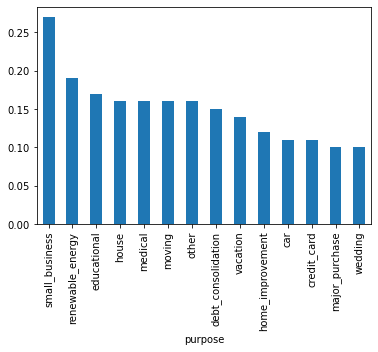

In [64]:
# Let's plot the risk factor for each category
analyze['bad_ratio'].plot(kind='bar')

Small Business Loans represent the highest risk (27% Default Probability). This should impose higher interest rate to cover for any losses.

In [65]:
analyze=analyze_cat('addr_state')
analyze

,good_loan,bad_loan,good_ratio,bad_ratio
addr_state,,,,
NE,2,3,0.40,0.60
NV,371,108,0.77,0.23
AK,63,15,0.81,0.19
SD,50,12,0.81,0.19
FL,2277,504,0.82,0.18
ID,5,1,0.83,0.17
MO,556,114,0.83,0.17
HI,138,28,0.83,0.17
OR,364,71,0.84,0.16


NE shows very high Default probability, but this is due to the limited number of loans. NV and FL show higher Default probability compared to other states, Interest rates should be increased for such states. 

In [66]:
analyze=analyze_cont('loan_amnt',5000)      # Do biunning of 5000 on the loan amount
analyze

,good_loan,bad_loan,good_ratio,bad_ratio
loan_amnt_range,,,,
5000,6417,1027,0.86,0.14
10000,10454,1567,0.87,0.13
15000,7496,1158,0.87,0.13
20000,3866,785,0.83,0.17
25000,2530,515,0.83,0.17
30000,1364,326,0.81,0.19
35000,372,99,0.79,0.21
40000,451,150,0.75,0.25


<AxesSubplot:xlabel='loan_amnt_range'>

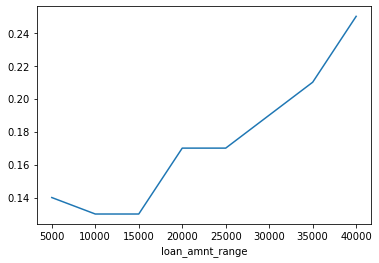

In [67]:
# Let's plot the risk factor for each category
analyze['bad_ratio'].plot()

High loan amounts are aassociated with higher default probability. Loan amounts of 15K+ has a default probability of 18% compared to 14% for lower amounts

In [68]:
analyze=analyze_cont('int_rate', 5)
analyze

,good_loan,bad_loan,good_ratio,bad_ratio
int_rate_range,,,,
10,9623,618,0.94,0.06
15,16228,2664,0.86,0.14
20,6484,1970,0.77,0.23
25,615,375,0.62,0.38


<AxesSubplot:xlabel='int_rate_range'>

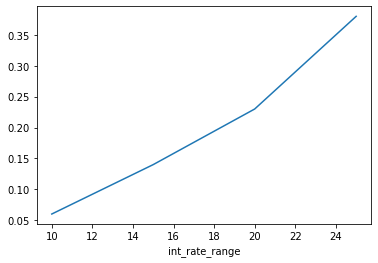

In [69]:
analyze['bad_ratio'].plot()

Higher interest rates are associated with higher Default probability. Interest rate > 14% leads to 25% default probability compared with 6% for Interest rates < 9%

In [70]:
analyze=analyze_cont('installment', 100)
analyze

,good_loan,bad_loan,good_ratio,bad_ratio
installment_range,,,,
100,3376,599,0.85,0.15
200,7885,1214,0.87,0.13
300,6540,1068,0.86,0.14
400,6130,994,0.86,0.14
500,3345,611,0.85,0.15
600,2170,437,0.83,0.17
700,1515,293,0.84,0.16
800,689,140,0.83,0.17
900,878,173,0.84,0.16


<AxesSubplot:xlabel='installment_range'>

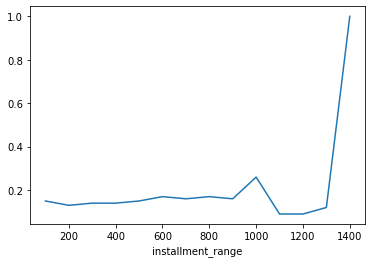

In [71]:
analyze['bad_ratio'].plot()

Installments doesn't seem to have direct effect on Default probability. The high probability for installments >1300 is due to just 2 loans at 1400 installments and can't be used as basis for analysis. 

In [72]:
analyze=analyze_cont('annual_inc', 10000)
analyze

,good_loan,bad_loan,good_ratio,bad_ratio
annual_inc_range,,,,
10000,65,14,0.82,0.18
20000,766,213,0.78,0.22
30000,2212,473,0.82,0.18
40000,4205,895,0.82,0.18
50000,4663,854,0.85,0.15
...,...,...,...,...
1790000,1,0,1.00,0.00
1910000,1,0,1.00,0.00
2040000,1,0,1.00,0.00


<AxesSubplot:xlabel='annual_inc_range'>

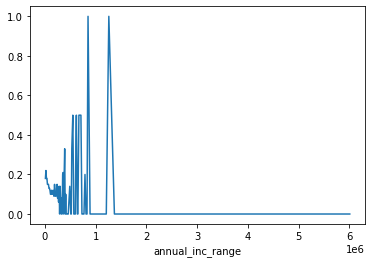

In [73]:
analyze['bad_ratio'].plot()

Default Probability is high with lowe annual income; Higher annual income provides a less risky investment.

In [74]:
analyze=analyze_cont('dti',1)
analyze

,good_loan,bad_loan,good_ratio,bad_ratio
dti_range,,,,
1,848,110,0.89,0.11
2,755,118,0.86,0.14
3,816,115,0.88,0.12
4,892,134,0.87,0.13
5,1108,148,0.88,0.12
6,1183,145,0.89,0.11
7,1242,184,0.87,0.13
8,1413,200,0.88,0.12
9,1492,232,0.87,0.13


<AxesSubplot:xlabel='dti_range'>

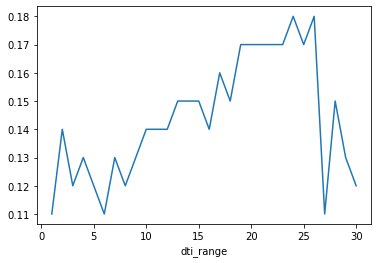

In [75]:
analyze['bad_ratio'].plot()

Highere dti represent higher riskj and higher probability of default.